In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
# Load data (deserialize)
Model=[]
Codes=[]
Root='C:\Septiembre-Octubre\Optimizacion modelos\Pruebas LSTM\Multicanal_Uds\Validation'
for filename in os.listdir(Root):
    print(filename)
    Codes.append(filename[8:])
    f = os.path.join(Root, filename)
    # checking if it is a file
    with open(f, 'rb') as handle:
        Model.append(pickle.load(handle))
##################################################3
############################################    

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\Septiembre-Octubre\\Optimizacion modelos\\Pruebas LSTM\\Multicanal_Uds\\Validation'

In [2]:
n_sessions=6
n_models=len(Codes)
prec_means=[]
rec_means=[]
F1_means=[]
th_arrays=[]
# Para la matriz de calor
F1_max=np.empty(shape=(n_models,n_sessions))
F1_max_plot=np.empty(shape=(n_models,n_sessions,3))

for n in range(n_models):
    print(Codes[n])
    performance=np.nan_to_num(Model[n]['Performance'])
    n_sessions,n_th,j=np.shape(performance)
    th_arr=performance[0,:,1]
    prec_arr=np.empty(shape=(n_sessions,n_th))
    rec_arr=np.empty(shape=(n_sessions,n_th))
    F1_arr=np.empty(shape=(n_sessions,n_th))
    # Solo hay un array de ths
    for i in range(n_sessions):
        prec_arr[i]=performance[i,:,2]
        rec_arr[i]=performance[i,:,3]
        F1_arr[i]=performance[i,:,4]
        F1_max[n][i]=max(performance[i,:,4])
        F1_max_plot[n][i]=performance[i,np.argmax(performance[i,:,4]),2:]

    prec_means.append(np.mean(prec_arr,axis=0))
    rec_means.append(np.mean(rec_arr,axis=0))
    F1_means.append(np.mean(F1_arr,axis=0))
    th_arrays.append(th_arr)
            


Ch1_W60_Ts32_Bi0_L2_U10_E30_TB256.val
Ch1_W60_Ts32_Bi0_L2_U5_E30_TB256.val
Ch1_W60_Ts32_Bi0_L2_U6_E30_TB256.val
Ch1_W60_Ts32_Bi0_L2_U7_E30_TB256.val
Ch1_W60_Ts32_Bi0_L2_U8_E30_TB256.val
Ch1_W60_Ts32_Bi0_L2_U9_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U10_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U5_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U6_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U7_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U8_E30_TB256.val
Ch3_W60_Ts32_Bi0_L2_U9_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U10_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U5_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U6_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U7_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U8_E30_TB256.val
Ch8_W60_Ts32_Bi0_L2_U9_E30_TB256.val


Sección de representación de precision y recall dejando fijo th1 en best

Fin de la sección 1. Ahora histograma? y matriz de calor

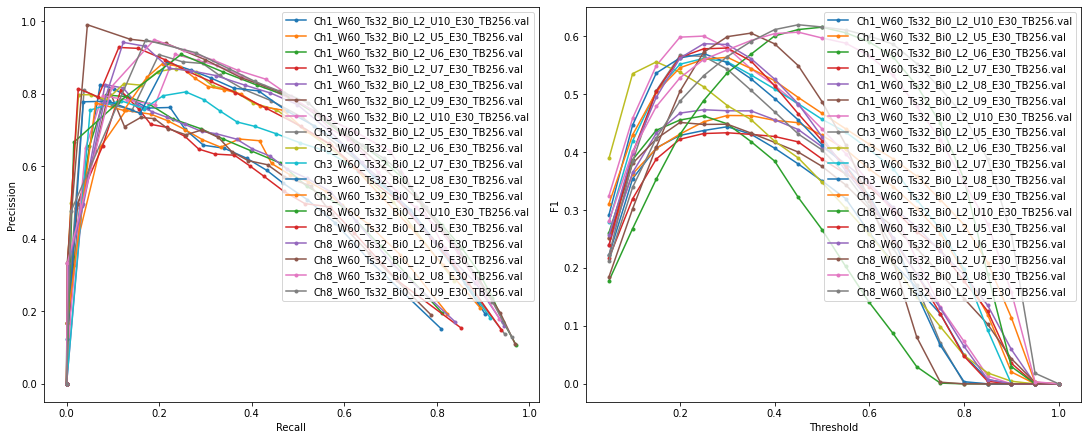

In [3]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))
inc=1.0/n_models
for i in range(n_models):
    axs[0].plot(rec_means[i],prec_means[i],'-',marker='.')#,c=str(i*inc))
    axs[1].plot(th_arrays[i],F1_means[i],'-',marker='.')#,c=str(i*inc))

axs[0].set(xlabel="Recall",ylabel="Precission")
axs[1].set(xlabel="Threshold",ylabel="F1")
axs[0].legend(Codes,fontsize=10,loc='upper right')
axs[1].legend(Codes,fontsize=10,loc='upper right')
plt.savefig("Prec rec y F1 todas las arquitecturas.svg")



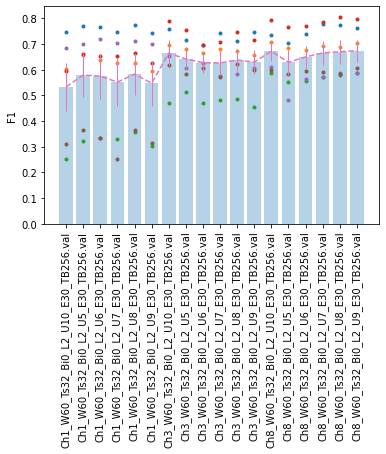

In [4]:
#F1_means=np.empty(shape=(n_models,n_th2))

F1_mod_means=np.mean(F1_max,axis=1)
F1_mod_stdev=np.std(F1_max,axis=1)
X=np.linspace(0,n_models-1,n_models,dtype=int)
for j in range(n_sessions):
    plt.plot(X,F1_max[:,j],'.')
plt.bar(X,F1_mod_means,alpha=0.33)
plt.errorbar(X,F1_mod_means,F1_mod_stdev/2,linestyle='--',elinewidth=1)
plt.ylabel("F1")
plt.xticks(X,Codes,rotation='vertical')
plt.savefig("Mean of models todas las arquitecturas.svg")


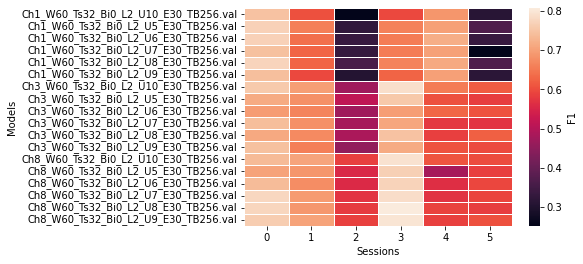

In [5]:
F1_mat=np.empty(shape=(n_models,n_sessions))
for j in range(n_models):
    for i in range(n_sessions):
        F1_mat[j][i]=F1_max[j,i]


ax = sns.heatmap(F1_mat, linewidth=0.5,cbar_kws={'label': 'F1'})
ax.set(xlabel='Sessions', ylabel='Models')
ax.set_yticklabels(Codes,rotation=0)
plt.savefig("Heatmap todas las arquitecturas.svg")
plt.show()

In [18]:
n_channels=3
window_size=60
timesteps=32
bi=0
n_layers=5
n_uds=20
n_epochs=30
n_train_batch=256
directory = "Model_Ch"+str(n_channels)+"_W"+str(window_size)+"_Ts"+str(timesteps)+"_Bi"+str(bi)+"_L"+str(n_layers)+"_U"+( (str(n_uds)) if len(str(n_uds))!=1 else ("0"+str(n_uds))) +"_E"+str(n_epochs)+"_TB"+str(n_train_batch)
print(directory)

Model_Ch3_W60_Ts32_Bi0_L5_U20_E30_TB256
